In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score

In [44]:
df = pd.read_csv(r'C:\Users\masha\Downloads\balanced_complaints.csv')

In [45]:
df_no_text = df.drop(columns=['Consumer complaint narrative'])

In [46]:
print(df_no_text)

     Date received                                            Product  \
0        3/25/2016                                    Debt collection   
1         5/8/2015                                    Debt collection   
2        1/21/2016                                    Debt collection   
3         5/1/2015                                    Debt collection   
4        9/26/2015                                        Credit card   
...            ...                                                ...   
7319     2/17/2018          Payday loan, title loan, or personal loan   
7320      1/5/2017                                    Debt collection   
7321    12/30/2015                                      Consumer Loan   
7322    10/15/2018                                    Debt collection   
7323     6/22/2023  Credit reporting, credit repair services, or o...   

                                           Issue  \
0             False statements or representation   
1          Cont'd a

In [47]:
print(len(df_no_text))

7324


In [48]:
product_counts = df['Product'].value_counts().nunique()
print(product_counts)

19


In [49]:
issue_counts = df['Issue'].value_counts().nunique()
print(issue_counts)

64


In [50]:
public_response_counts = df['Company public response'].value_counts().nunique()
print(public_response_counts)

11


In [51]:
consumer_response_counts = df['Company response to consumer'].value_counts().nunique()
print(consumer_response_counts)

4


In [52]:
from workalendar.usa import UnitedStates
from datetime import datetime


In [53]:
# Initialize the calendar for the United States
cal = UnitedStates()

In [57]:
df['Date received'] = pd.to_datetime(df['Date received'])
df['Date sent to company'] = pd.to_datetime(df['Date sent to company'])

# Function to calculate business days
def calculate_business_days(row):
    return cal.get_working_days_delta(row['Date received'].date(), row['Date sent to company'].date())

# Apply the function to each row and create a new column
df["Business Days"] = df.apply(calculate_business_days, axis=1)

print(df)


     Date received                                            Product  \
0       2016-03-25                                    Debt collection   
1       2015-05-08                                    Debt collection   
2       2016-01-21                                    Debt collection   
3       2015-05-01                                    Debt collection   
4       2015-09-26                                        Credit card   
...            ...                                                ...   
7319    2018-02-17          Payday loan, title loan, or personal loan   
7320    2017-01-05                                    Debt collection   
7321    2015-12-30                                      Consumer Loan   
7322    2018-10-15                                    Debt collection   
7323    2023-06-22  Credit reporting, credit repair services, or o...   

                                           Issue  \
0             False statements or representation   
1          Cont'd a

In [66]:
for i in range(21):  # Loop from 0 to 20
    count = len(df[df['Business_Days'] == i])
    print(f"Number of rows with {i} business days: {count}")



Number of rows with 0 business days: 5854
Number of rows with 1 business days: 246
Number of rows with 2 business days: 225
Number of rows with 3 business days: 197
Number of rows with 4 business days: 113
Number of rows with 5 business days: 70
Number of rows with 6 business days: 75
Number of rows with 7 business days: 30
Number of rows with 8 business days: 35
Number of rows with 9 business days: 43
Number of rows with 10 business days: 31
Number of rows with 11 business days: 37
Number of rows with 12 business days: 33
Number of rows with 13 business days: 37
Number of rows with 14 business days: 22
Number of rows with 15 business days: 17
Number of rows with 16 business days: 29
Number of rows with 17 business days: 7
Number of rows with 18 business days: 18
Number of rows with 19 business days: 4
Number of rows with 20 business days: 11


In [59]:
print(df['Business Days'].describe())

count    7324.000000
mean        1.905926
std         7.598650
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       171.000000
Name: Business Days, dtype: float64


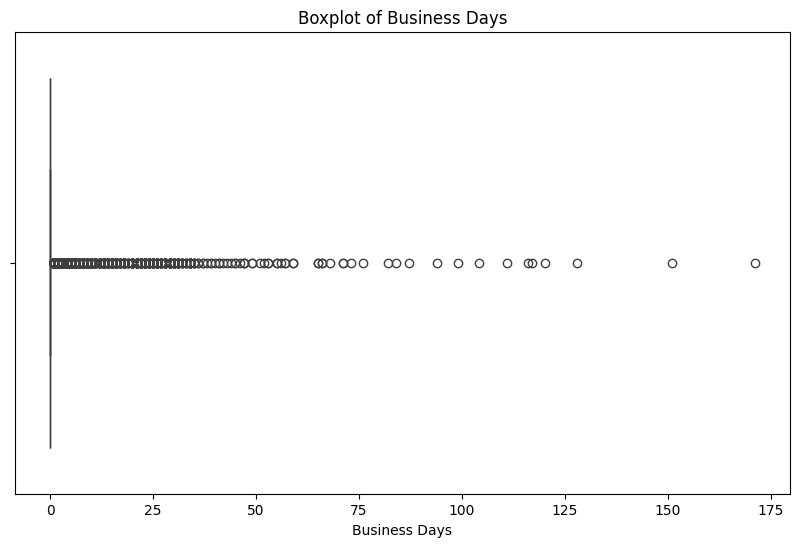

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of 'Business Days'
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Business Days'])
plt.title('Boxplot of Business Days')
plt.show()

In [67]:
# Remove outliers, decide how we're handling outliers
Q1 = df['Business Days'].quantile(0.25)
Q3 = df['Business Days'].quantile(0.75)

IQR = Q3 - Q1  # Corrected calculation for IQR

print(Q1)
print(Q3)
print(IQR)

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the data to remove outliers
df_clean = df[(df['Business Days'] >= lower_bound) & (df['Business Days'] <= upper_bound)]

# Check the resulting statistics
print(df_clean['Business Days'].mean())
print(df_clean['Business Days'].std())

0.0
0.0
0.0
0.0
0.0


Current method of removing outliers leaves only 0s, so this in invalid, need to come up with a better way to remove outliers.

In [39]:
print(df[['Date received', 'Date sent to company', 'Business Days', 'Timely response?']])

     Date received Date sent to company  Business Days Timely response?
0        3/25/2016            3/26/2016              1               No
1         5/8/2015            5/11/2015              2               No
2        1/21/2016            1/21/2016              1              Yes
3         5/1/2015             5/1/2015              1              Yes
4        9/26/2015            9/29/2015              2              Yes
...            ...                  ...            ...              ...
7319     2/17/2018            2/17/2018              0               No
7320      1/5/2017            2/10/2017             26              Yes
7321    12/30/2015           12/30/2015              1              Yes
7322    10/15/2018           10/15/2018              1               No
7323     6/22/2023            6/22/2023              1              Yes

[7324 rows x 4 columns]


In [38]:
print(df_clean[['Date received', 'Date sent to company', 'Business Days', 'Timely response?']])

     Date received Date sent to company  Business Days Timely response?
0        3/25/2016            3/26/2016              1               No
2        1/21/2016            1/21/2016              1              Yes
3         5/1/2015             5/1/2015              1              Yes
5        1/16/2020            1/16/2020              1              Yes
8         2/1/2023             2/1/2023              1              Yes
...            ...                  ...            ...              ...
7317     2/26/2021            2/26/2021              1               No
7318     5/23/2017            5/23/2017              1               No
7321    12/30/2015           12/30/2015              1              Yes
7322    10/15/2018           10/15/2018              1               No
7323     6/22/2023            6/22/2023              1              Yes

[4822 rows x 4 columns]


In [50]:
df_cleaned = df[(df['Business Days'] >= lower_bound) & (df['Business Days'] <= upper_bound)]


In [51]:
len(df_cleaned)

4822

In [30]:
print(df_cleaned)

NameError: name 'df_cleaned' is not defined

In [62]:
no_df = df[(df['Timely response?'] == 'No')]
print(len(no_df))

yes_df = df[(df['Timely response?'] == 'Yes')]
print(len(yes_df))


3662
3662


In [63]:
print("Statistics for 'Yes':")
print(yes_df['Business Days'].describe())
print("\nStatistics for 'No':")
print(no_df['Business Days'].describe())

Statistics for 'Yes':
count    3662.000000
mean        2.524031
std         6.696597
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max       131.000000
Name: Business Days, dtype: float64

Statistics for 'No':
count    3662.000000
mean        3.015565
std         8.682070
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max       179.000000
Name: Business Days, dtype: float64


In [64]:
no_df = df_cleaned[(df_cleaned['Timely response?'] == 'No')]
print(len(no_df))

yes_df = df_cleaned[(df_cleaned['Timely response?'] == 'Yes')]
print(len(yes_df))


2320
2502


Number of samples went down from 7324 to 4822 after outliers were removed, resulting in 2320 'Nos' and 2502 'Yes'

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [66]:
print("Statistics for 'Yes':")
print(yes_df['Business Days'].describe())
print("\nStatistics for 'No':")
print(no_df['Business Days'].describe())

Statistics for 'Yes':
count    2502.0
mean        1.0
std         0.0
min         1.0
25%         1.0
50%         1.0
75%         1.0
max         1.0
Name: Business Days, dtype: float64

Statistics for 'No':
count    2320.0
mean        1.0
std         0.0
min         1.0
25%         1.0
50%         1.0
75%         1.0
max         1.0
Name: Business Days, dtype: float64


In [68]:
print(df_cleaned)

     Date received                                            Product  \
0        3/25/2016                                    Debt collection   
2        1/21/2016                                    Debt collection   
3         5/1/2015                                    Debt collection   
5        1/16/2020          Payday loan, title loan, or personal loan   
8         2/1/2023                        Credit card or prepaid card   
...            ...                                                ...   
7317     2/26/2021                                    Debt collection   
7318     5/23/2017                                    Debt collection   
7321    12/30/2015                                      Consumer Loan   
7322    10/15/2018                                    Debt collection   
7323     6/22/2023  Credit reporting, credit repair services, or o...   

                                           Issue  \
0             False statements or representation   
2                  

In [27]:
pip install dython --upgrade


Note: you may need to restart the kernel to use updated packages.Collecting dython




[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [28]:
from dython.nominal import associations


In [32]:
df_timely_response = df_cleaned[['Product','Issue', 'Company public response', 'Company response to consumer', 'Timely response?']]

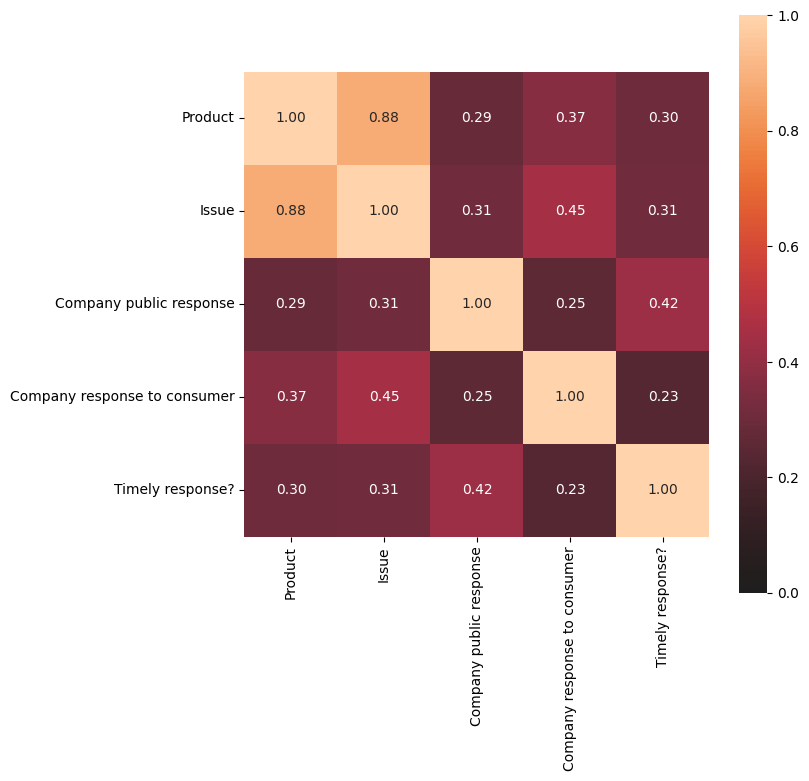

{'corr':                                Product     Issue  Company public response  \
 Product                       1.000000  0.875589                 0.287263   
 Issue                         0.875589  1.000000                 0.307815   
 Company public response       0.287263  0.307815                 1.000000   
 Company response to consumer  0.368476  0.445384                 0.250384   
 Timely response?              0.297269  0.306395                 0.424108   
 
                               Company response to consumer  Timely response?  
 Product                                           0.368476          0.297269  
 Issue                                             0.445384          0.306395  
 Company public response                           0.250384          0.424108  
 Company response to consumer                      1.000000          0.233874  
 Timely response?                                  0.233874          1.000000  ,
 'ax': <Axes: >}

In [33]:
associations(df_timely_response)


In [47]:
# One-hot encode categorical columns
"""
Product #need to actually remove Product because Issues are unique 
Issue
Company public response
Company response to consumer
"""


'\nProduct #need to actually remove Product because Issues are unique \nIssue\nCompany public response\nCompany response to consumer\n'

In [ ]:
from scipy.stats import chi2_contingency


def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    return np.sqrt(chi2 / (n * (min(confusion_matrix.shape) - 1)))


confusion_matrix = pd.crosstab(df['cat_var1'], df['cat_var2'])
cramers_v_value = cramers_v(confusion_matrix)
print("Cramér's V:", cramers_v_value)


In [49]:
print(df_timely_response)

                                           Issue  \
0             False statements or representation   
2                          Communication tactics   
3          Cont'd attempts collect debt not owed   
5     Charged fees or interest you didn't expect   
8                               Fees or interest   
...                                          ...   
7317           Attempts to collect debt not owed   
7318                       Communication tactics   
7321         Problems when you are unable to pay   
7322             Written notification about debt   
7323        Incorrect information on your report   

                                Company public response  \
0     Company believes it acted appropriately as aut...   
2     Company can't verify or dispute the facts in t...   
3     Company believes it acted appropriately as aut...   
5     Company believes it acted appropriately as aut...   
8     Company believes complaint caused principally ...   
...                  

In [50]:
df_timely_response['Timely response?'] = df_timely_response['Timely response?'].map({'Yes': 1, 'No': 0})


C:\Users\masha\AppData\Local\Temp\ipykernel_22120\3403067569.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_timely_response['Timely response?'] = df_timely_response['Timely response?'].map({'Yes': 1, 'No': 0})


In [51]:
columns_to_encode = ['Issue', 'Company public response', 'Company response to consumer']

In [52]:
df_timely_response_encoded = pd.get_dummies(df_timely_response, columns=columns_to_encode)

In [53]:
print(df_timely_response_encoded.head())

   Timely response?  Issue_APR or interest rate  \
0                 0                       False   
2                 1                       False   
3                 1                       False   
5                 1                       False   
8                 1                       False   

   Issue_Account opening, closing, or management  Issue_Advertising  \
0                                          False              False   
2                                          False              False   
3                                          False              False   
5                                          False              False   
8                                          False              False   

   Issue_Advertising and marketing  \
0                            False   
2                            False   
3                            False   
5                            False   
8                            False   

   Issue_Advertising and marketing, i

In [54]:
# Define features (X) and target (y)
X = df_timely_response_encoded.drop(['Timely response?'], axis=1)
y = df_timely_response_encoded['Timely response?']

# Split the data into train, test and validation sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [55]:
# Initialize Gradient Boosting Classifier
gb = GradientBoostingClassifier(random_state=42)

# Define hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10]
}

In [56]:
# Set up GridSearchCV
grid_search = GridSearchCV(estimator=gb, param_grid=param_grid, cv=3, scoring='accuracy', verbose=2, n_jobs=-1)


In [57]:
# Fit the model
print("Tuning hyperparameters with GridSearchCV...")
grid_search.fit(X_train, y_train)

Tuning hyperparameters with GridSearchCV...
Fitting 3 folds for each of 81 candidates, totalling 243 fits


GridSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]},
             scoring='accuracy', verbose=2)

In [58]:
# Best parameters
print("Best hyperparameters:", grid_search.best_params_)

Best hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 100}


In [59]:
# Evaluate on validation set
best_model = grid_search.best_estimator_
y_val_pred = best_model.predict(X_val)

In [60]:
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print("\nClassification Report:\n", classification_report(y_val, y_val_pred))

Validation Accuracy: 0.758298755186722

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.78      0.76       473
           1       0.78      0.74      0.76       491

    accuracy                           0.76       964
   macro avg       0.76      0.76      0.76       964
weighted avg       0.76      0.76      0.76       964



In [61]:
# Evaluate on test set
y_test_pred = best_model.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("\nClassification Report:\n", classification_report(y_test, y_test_pred))

Test Accuracy: 0.7523316062176166

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.79      0.76       467
           1       0.79      0.71      0.75       498

    accuracy                           0.75       965
   macro avg       0.75      0.75      0.75       965
weighted avg       0.76      0.75      0.75       965



In [62]:
#repeat for predicting response time